### Model sources

TENSORFLOW 2: 
Model files and implementation: https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md

SSD (Single Shot MultiBox Detector):
Model files: https://github.com/weiliu89/caffe/tree/ssd#models
Caffe implementation: https://github.com/weiliu89/caffe/tree/ssd

YOLO (You Only Look Once):
Model files and Darknet implementation: https://github.com/AlexeyAB/darknet

Faster R-CNN (Region-based Convolutional Neural Networks):
Model files and Caffe implementation: https://github.com/rbgirshick/py-faster-rcnn

Mask R-CNN (Mask Region-based Convolutional Neural Networks):
Model files and implementation: https://github.com/matterport/Mask_RCNN


## Read model from caffe with opencv and run model on image

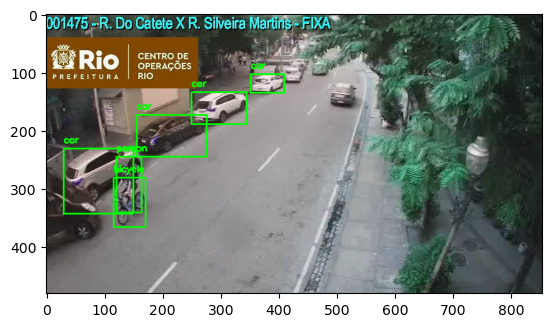

In [37]:
import cv2
import matplotlib.pyplot as plt

# Models from: https://github.com/weiliu89/caffe/tree/ssd

model_folder = '../Modelos/VGGNet/VOC0712Plus/SSD_300x300_ft/'
deploy_prototxt = model_folder + 'deploy.prototxt'
model_caffe = model_folder + 'VGG_VOC0712Plus_SSD_300x300_ft_iter_160000.caffemodel'

# model_folder = '../Modelos/VGGNet/VOC0712Plus/SSD_512x512_ft/'
# deploy_prototxt = model_folder + 'deploy.prototxt'
# model_caffe = model_folder + 'VGG_VOC0712Plus_SSD_512x512_ft_iter_160000.caffemodel'

# Load the pre-trained model
net = cv2.dnn.readNetFromCaffe(deploy_prototxt, model_caffe)

# Define the classes
classes = [
    "background",
    "aeroplane",
    "bicycle",
    "bird",
    "boat",
    "bottle",
    "bus",
    "car",
    "cat",
    "chair",
    "cow",
    "diningtable",
    "dog",
    "horse",
    "motorbike",
    "person",
    "pottedplant",
    "sheep",
    "sofa",
    "train",
    "tvmonitor"
]

# Load the input image

img_path = '../../Dados/images/1475/reference/day/CODE1475_20230329_16-40-54.jpg'
image = cv2.imread(img_path)

# Create a blob from the image
scaleFactor = 1.0
size = (512, 512)
mean = (127.5, 127.5, 127.5)
# blob = cv2.dnn.blobFromImage(image, scaleFactor, size, mean, swapRB=True, crop=False)
blob = cv2.dnn.blobFromImage(image, size=size)

# Set the input blob for the network
net.setInput(blob)

# Forward pass through the network
detections = net.forward()

# Loop over the detections
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    # Filter out weak detections
    if confidence > 0.5:
        class_id = int(detections[0, 0, i, 1])
        class_label = classes[class_id]

        # Get the bounding box coordinates
        x1 = int(detections[0, 0, i, 3] * image.shape[1])
        y1 = int(detections[0, 0, i, 4] * image.shape[0])
        x2 = int(detections[0, 0, i, 5] * image.shape[1])
        y2 = int(detections[0, 0, i, 6] * image.shape[0])

        # Draw the bounding box and label on the image
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, class_label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the output image
# cv2.imshow(image)
ax = plt.imshow(image)

# cv2.waitKey(0)
cv2.destroyAllWindows()

## Average execution: Fancy timer class

In [38]:
# !pip install termcolor

import time
from tqdm import tqdm
from termcolor import colored
from IPython.display import clear_output as co

class ExecutionTimer:
    def __init__(self):
        self.execution_times = []

    def run(self, code_block, n=1):
        # print(colored("Running the code block...", "blue"))
        for i in tqdm(range(n), desc="Progress", unit="iteration", bar_format="{l_bar}%s{bar}%s{r_bar}" % (colored("|", "cyan"), colored("|", "cyan")), ncols=80):
            start_time = time.time()
            code_block()
            execution_time = time.time() - start_time
            self.execution_times.append(execution_time)
            tqdm.write(colored("Iteration {} execution time: {:.2f} seconds".format(i+1, execution_time), "green"))
        print(colored("Code block execution completed.", "blue"))

    def get_average_execution_time(self):
        total_execution_time = sum(self.execution_times)
        average_execution_time = total_execution_time / len(self.execution_times)
        return average_execution_time


# # Example usage
# def my_code_block():
#     # Insert your code block here
#     time.sleep(.1)  # Placeholder code that takes 1 second to execute

# timer = ExecutionTimer()
# timer.run(code_block=my_code_block, n=10)
# average_time = timer.get_average_execution_time()

# print(colored("\nSummary Report", "magenta"))
# print(colored("Average execution time: {:.2f} seconds".format(average_time), "cyan"))


#### Example usage · Measure detector frame rate in fps

In [40]:
import cv2

model_folder = '../Modelos/VGGNet/VOC0712Plus/SSD_300x300_ft/'
deploy_prototxt = model_folder + 'deploy.prototxt'
model_caffe = model_folder + 'VGG_VOC0712Plus_SSD_300x300_ft_iter_160000.caffemodel'

# model_folder = '../Modelos/VGGNet/VOC0712Plus/SSD_512x512_ft/'
# deploy_prototxt = model_folder + 'deploy.prototxt'
# model_caffe = model_folder + 'VGG_VOC0712Plus_SSD_512x512_ft_iter_160000.caffemodel'

net = cv2.dnn.readNetFromCaffe(deploy_prototxt, model_caffe)

classes = [
    "background", "aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat", "chair",
    "cow", "diningtable", "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa",
    "train", "tvmonitor"
]

img_path = '../../Dados/images/1475/reference/day/CODE1475_20230329_16-40-54.jpg'
image = cv2.imread(img_path)

size = (300, 300)
scaleFactor = 1.0
mean = (127.5, 127.5, 127.5)

# Preprocess the image
blob = cv2.dnn.blobFromImage(image, size=size) #, scaleFactor, size, mean, swapRB=swapRB, crop=False)

# Set the blob as input to the network
net.setInput(blob)

# Forward pass through the network once to warm up
net.forward()

def object_detection_code():

    detections = net.forward()
    filtered_detections = []

    # Loop over the detections
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]

        # Filter out weak detections
        if confidence > 0.5:
            class_id = int(detections[0, 0, i, 1])
            class_label = classes[class_id]

            # Get the bounding box coordinates
            x1 = int(detections[0, 0, i, 3] * image.shape[1])
            y1 = int(detections[0, 0, i, 4] * image.shape[0])
            x2 = int(detections[0, 0, i, 5] * image.shape[1])
            y2 = int(detections[0, 0, i, 6] * image.shape[0])

            # Add the filtered detection to the list
            filtered_detections.append((x1, y1, x2, y2, class_label))
            
timer = ExecutionTimer()
timer.run(code_block=object_detection_code, n=10)
average_time = timer.get_average_execution_time()

print(colored("\nSummary Report", "magenta"))
print(colored("Frame Rate: {:.2f} fps".format(1 / average_time), "cyan"))


Progress:  10%||██▌                      || 1/10 [00:00<00:08,  1.03iteration/s]

Iteration 1 execution time: 0.96 seconds


Progress:  20%||█████                    || 2/10 [00:01<00:07,  1.10iteration/s]

Iteration 2 execution time: 0.87 seconds


Progress:  30%||███████▌                 || 3/10 [00:02<00:06,  1.13iteration/s]

Iteration 3 execution time: 0.86 seconds


Progress:  40%||██████████               || 4/10 [00:03<00:05,  1.11iteration/s]

Iteration 4 execution time: 0.91 seconds


Progress:  50%||████████████▌            || 5/10 [00:04<00:04,  1.02iteration/s]

Iteration 5 execution time: 1.13 seconds


Progress:  60%||███████████████          || 6/10 [00:05<00:03,  1.04iteration/s]

Iteration 6 execution time: 0.91 seconds


Progress:  70%||█████████████████▌       || 7/10 [00:06<00:02,  1.04iteration/s]

Iteration 7 execution time: 0.96 seconds


Progress:  80%||████████████████████     || 8/10 [00:07<00:01,  1.03iteration/s]

Iteration 8 execution time: 0.98 seconds


Progress:  90%||██████████████████████▌  || 9/10 [00:08<00:01,  1.04s/iteration]

Iteration 9 execution time: 1.18 seconds


Progress: 100%||████████████████████████|| 10/10 [00:09<00:00,  1.02iteration/s]

Iteration 10 execution time: 0.95 seconds
Code block execution completed.

Summary Report
Frame Rate: 1.03 fps


## Models from Tensorflow Garden

In [ ]:
# !pip install tensorflow

In [43]:
import tensorflow as tf
import cv2
import numpy as np

def load_centernet_hourglass104_512x512():
    # Path to the downloaded model files
    model_path = '../Modelos/efficientdet_d4_coco17_tpu-32/saved_model'  # Replace with the path to the model files

    # Load the saved model
    model = tf.saved_model.load(model_path)

    return model

def preprocess_image(image):
    # Resize the image to match the model's input size
    image = cv2.resize(image, (512, 512))
    # Convert the image to float and normalize it
    image = image.astype(np.float32) / 255.0
    # Add an additional dimension to represent the batch size (required for inference)
    input_data = np.expand_dims(image, axis=0)
    return input_data

def run_inference(image_path, model):
    # Load the image
    image = cv2.imread(image_path)

    # Preprocess the image
    input_data = preprocess_image(image)

    # Run inference
    results = model(input_data)

    # Post-process the results (e.g., extract bounding boxes, keypoints, etc.)
    # ...

    # Return the processed results
    return results

# EXAMPLE USAGE

model = load_centernet_hourglass104_512x512()

# Provide an image path for inference
image_path = '../../Dados/images/1475/reference/day/CODE1475_20230329_16-40-54.jpg'

# Run inference using the loaded model
output = run_inference(image_path, model)

# Process the output as per your requirements
print(output)

{'raw_detection_boxes': <tf.Tensor: shape=(1, 196416, 4), dtype=float32, numpy=
array([[[ 0.68980193,  0.7164031 ,  0.6898024 ,  0.71640337],
        [-0.01225475, -0.01619281,  0.01451728,  0.0302752 ],
        [-0.0259371 , -0.0256898 ,  0.01390104,  0.03080618],
        ...,
        [ 0.6312038 ,  0.7744627 ,  1.1988595 ,  1.109927  ],
        [ 0.50808114,  0.6943135 ,  1.3040578 ,  1.1708268 ],
        [ 0.39457774,  0.6252785 ,  1.393319  ,  1.2302465 ]]],
      dtype=float32)>, 'detection_multiclass_scores': <tf.Tensor: shape=(1, 100, 90), dtype=float32, numpy=
array([[[0.07506522, 0.02006455, 0.04459739, ..., 0.01866755,
         0.01228024, 0.02671342],
        [0.07506522, 0.02006455, 0.04459739, ..., 0.01866755,
         0.01228024, 0.02671342],
        [0.04011907, 0.01302019, 0.01082112, ..., 0.01627013,
         0.01352492, 0.01275494],
        ...,
        [0.04011907, 0.01302019, 0.01082112, ..., 0.01627013,
         0.01352492, 0.01275494],
        [0.01631081, 0.00462

#### Load tensorflow model using opencv

In [52]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

def load_centernet_hourglass104_512x512(path_to_model_files):
    model = tf.saved_model.load(path_to_model_files)
    return model

def process_live_stream(path_to_stream, model, n_frames):
    cap = cv2.VideoCapture(path_to_stream)
    frame_count = 0

    while frame_count < n_frames:
        ret, frame = cap.read()

        if not ret:
            break

        # Preprocess the frame
        resized_frame = cv2.resize(frame, (512, 512))
        input_tensor = tf.convert_to_tensor(resized_frame)
        input_tensor = input_tensor[tf.newaxis, ...]

        # Run the model
        detections = model(input_tensor)

        # Process the output detections
        boxes = detections['detection_boxes'][0].numpy()
        scores = detections['detection_scores'][0].numpy()

        # Draw bounding boxes on the frame
        for i, score in enumerate(scores):
            if score > 0.5:
                y1, x1, y2, x2 = boxes[i]
                h, w, _ = frame.shape
                x1 = int(x1 * w)
                y1 = int(y1 * h)
                x2 = int(x2 * w)
                y2 = int(y2 * h)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Display the processed frame
        plt.imshow(frame)
        plt.show()
        # if cv2.waitKey(1) == ord('q'):
            # break

        frame_count += 1

    cap.release()
    cv2.destroyAllWindows()

In [ ]:
# Example usage
path_to_model_files = '../Modelos/efficientdet_d4_coco17_tpu-32/saved_model'  # Replace with the path to the model files
model = load_centernet_hourglass104_512x512(path_to_model_files)

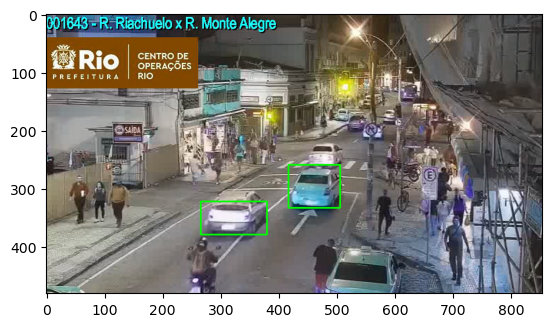

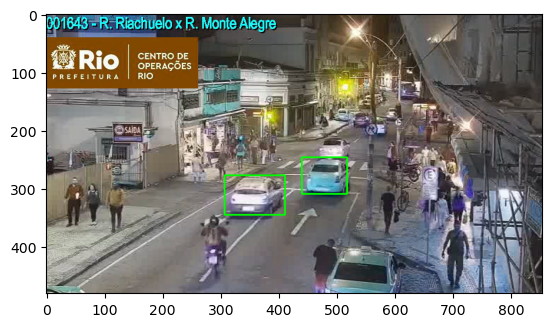

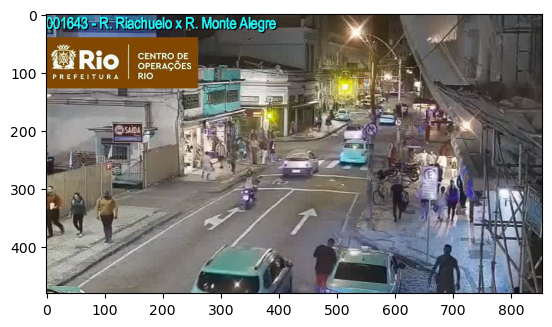

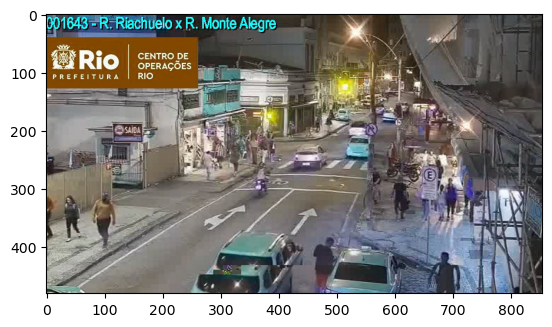

In [51]:
# Replace with the path to your live image stream, or 0 for webcam
path_to_stream = 'http://187.111.99.18:9004/?CODE=1643'
n_frames = 10  # Number of frames to process and display

process_live_stream(path_to_stream, model, n_frames)

#### Measure execution time for tensorflow model

In [ ]:
timer = ExecutionTimer()
timer.run(code_block=object_detection_code, n=10)
average_time = timer.get_average_execution_time()

print(colored("\nSummary Report", "magenta"))
print(colored("Frame Rate: {:.2f} fps".format(1 / average_time), "cyan"))
